# investigating Data

## Authors
* **Alireza Arbabi**
* **Hadi Babalou**
* **Ali Padyav**

## Table of Contents

- [Setting Up the Environment](#setting-up-the-environment)
- [Sunken Ship Passengers](#sunken-ship-passengers)
- [Data Scientist Salaries](#data-scientist-salaries)

## Setting Up the Environment

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install tqdm
!pip install scipy
!pip install forex-python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from forex_python.converter import CurrencyRates
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

## Sunken Ship Passengers

The `passengers dataset` contains information about the passengers of the sunken ship **RMS Lusitania**. In this task, we will become familiar with working with numpy, pandas, and matplotlib.

This is a brief explanation of the columns in the given dataset:
* **survived** - 1 if the passenger survived, 0 otherwise
* **pclass** - Passenger class (1, 2, or 3)
* **sex** - The passenger's sex (male or female)
* **age** - The passenger's age in years
* **sibsp** - The number of siblings or spouses the passenger had aboard the ship
* **parch** - The number of parents or children the passenger had aboard the ship
* **fare** - The fare the passenger paid for their ticket
* **embarked** - The passenger's port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* **class** - The class of the ticket (First, Second, or Third)
* **who** - Categories of passengers (man, woman, or child)
* **adult_male** - A boolean indicating if the passenger is an adult male or not.
* **deck** - The deck the passenger's cabin was on, indicated by the first letter of the cabin's name
* **embark_town** - The port of embarkation
* **alive** - A boolean indicating if the passenger survived or not
* **alone** - A boolean indicating if the passenger was alone or not

#### Firing up the essential libraries

In [2]:
df1 = pd.read_csv("passengers_dataset.csv")

Q1: Let's getting familiar with our dataset by using the .info() command. This command shows the number of Non-Null objects for each column, as well as their data types.

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


By using the .describe() command, we can gain statistical insights about the dataset. 

In [4]:
df1.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The head() and tail() commands also show the top 10 and latest 10 rows of the dataset.

In [5]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


#### Q2: Labeling on categorical data

In [7]:
df1.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

Let's analyze each categorical column to decide about the encoding method wisely:

In [8]:
categorical_columns = df1.select_dtypes(include=['object', 'category', 'bool'])

for column in categorical_columns.columns:
    print(f"Value counts for column '{column}':")
    print(df1[column].value_counts())
    print()

Value counts for column 'sex':
male      577
female    314
Name: sex, dtype: int64

Value counts for column 'embarked':
S    644
C    168
Q     77
Name: embarked, dtype: int64

Value counts for column 'class':
Third     491
First     216
Second    184
Name: class, dtype: int64

Value counts for column 'who':
man      537
woman    271
child     83
Name: who, dtype: int64

Value counts for column 'adult_male':
True     537
False    354
Name: adult_male, dtype: int64

Value counts for column 'deck':
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

Value counts for column 'embark_town':
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

Value counts for column 'alive':
no     549
yes    342
Name: alive, dtype: int64

Value counts for column 'alone':
True     537
False    354
Name: alone, dtype: int64



For performing the encoding we have 2 main solutions which works well here:

1. Label-Encoding: Label encoding is a technique used to convert categorical variables into numerical format by assigning a unique integer to each category, preserving ordinality if present.

2. On-Hot Encoding: One-hot encoding is a method to represent categorical variables as binary vectors, where each category is represented by a binary value (0 or 1) in a separate feature, indicating its presence or absence.

In general, Label-Encoding is used when the values have ordinal relation with each other, while one-hot encoding should be used when the values do not have ordinal relation with each other.

Now based on the provided explanation, we perform the encoding for each columns as follows:

We do label encoding for all categorical columns except the 'deck' column, and we perform one-hot encoding for the 'deck' column to prevent it from being misintended on having relations between its values.  

In [9]:
label_encoder = LabelEncoder()

df1_new = df1.copy()


column_mappings = {}
for column in categorical_columns.columns:
        if column != 'deck':
            df1_new[column] = label_encoder.fit_transform(df1_new[column])
            column_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        else:
            df1_new = pd.get_dummies(df1_new, columns = ['deck'])

Here is our column mappings documenation:

In [10]:
column_mappings

{'sex': {'female': 0, 'male': 1},
 'embarked': {'C': 0, 'Q': 1, 'S': 2, nan: 3},
 'class': {'First': 0, 'Second': 1, 'Third': 2},
 'who': {'child': 0, 'man': 1, 'woman': 2},
 'adult_male': {False: 0, True: 1},
 'embark_town': {'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2, nan: 3},
 'alive': {'no': 0, 'yes': 1},
 'alone': {False: 0, True: 1}}

output result:

In [11]:
df1_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,22.0,1,0,7.2500,2,2,1,...,2,0,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,...,0,1,0,0,0,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,...,2,1,1,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,0,2,...,2,1,0,0,0,1,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,...,2,0,1,0,0,0,0,0,0,0


#### Q3: Generating the correlation matrix heatmap

<AxesSubplot: title={'center': 'Correlation Matrix'}>

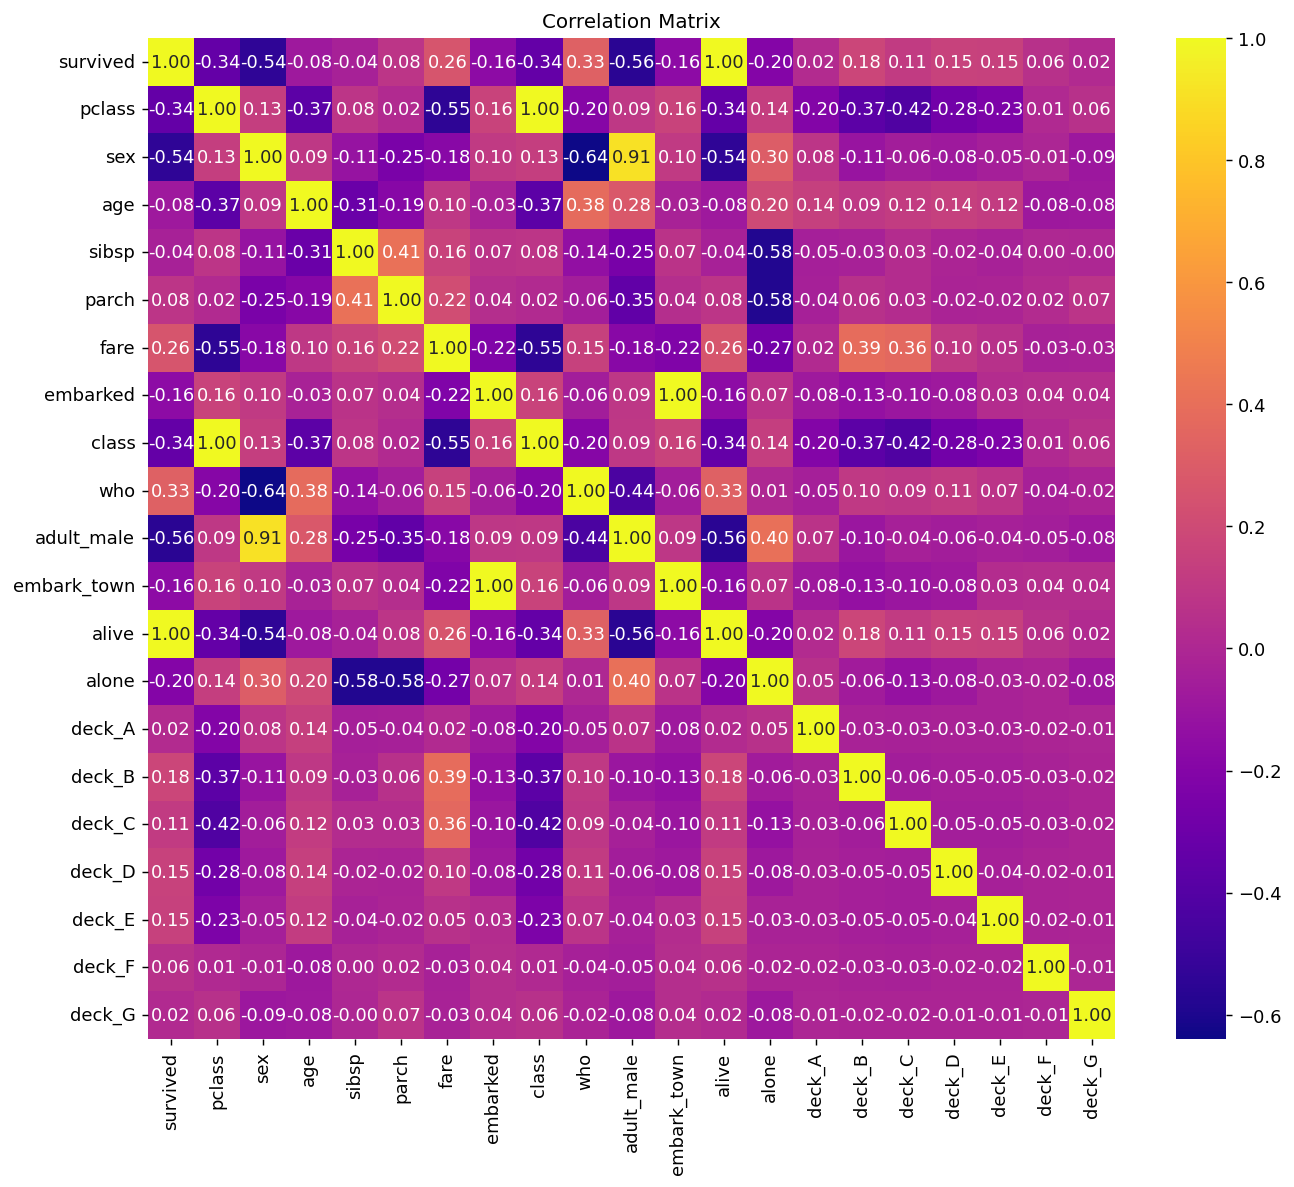

In [12]:
plt.figure (figsize = [12,10],  dpi = 130)
plt.title ("Correlation Matrix" , fontsize = 11)
correlation_matrix = df1_new.corr()
sns.heatmap (df1_new.corr(), annot=True , cmap="plasma", fmt = ".2f")

#### Q4: Deleting extra columns

In [13]:
df1_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,22.0,1,0,7.2500,2,2,1,...,2,0,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,...,0,1,0,0,0,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,...,2,1,1,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,0,2,...,2,1,0,0,0,1,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,...,2,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,...,2,0,1,0,0,0,0,0,0,0
887,1,1,0,19.0,0,0,30.0000,2,0,2,...,2,1,1,0,1,0,0,0,0,0
888,0,3,0,NaN,1,2,23.4500,2,2,2,...,2,0,0,0,0,0,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,1,...,0,1,1,0,0,1,0,0,0,0


In [14]:
correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] == 1:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

            # df1_new.drop(df1_new.columns[j - dropped_columns_count], axis=1, inplace=True)
            # dropped_columns_count += 1
            
for pair in correlated_pairs:
    df1_new.drop(pair[1], axis=1, inplace=True)  # Drop the second column in each pair

In [15]:
df1_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,22.0,1,0,7.2500,2,1,1,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,0,0,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,1,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,2,0,0,0,0,1,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,1,0,0,0,0,0,0,0
887,1,1,0,19.0,0,0,30.0000,2,2,0,1,0,1,0,0,0,0,0
888,0,3,0,NaN,1,2,23.4500,2,2,0,0,0,0,0,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,0,1,1,1,0,0,1,0,0,0,0


#### Q5: Number of survived passengers

In [16]:
df1_new[df1_new['survived'] == 1].shape[0]

342

#### Q6: all female passengers aged more than 30 years. 

In [17]:
df1_new[(df1_new['sex'] == 0) & (df1_new['age'] > 30)].shape[0]

103

In [18]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
df1_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,22.0,1,0,7.2500,2,1,1,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,0,0,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,1,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,2,0,0,0,0,1,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,1,0,0,0,0,0,0,0


#### Q7: Identify passengers who embarked from Cherbourg ('C') and paid a fare greater than $100.

In [20]:
df1_new[(df1_new['embarked'] == 0) & (df1_new['fare'] > 100)].shape[0]

29

#### Q8: Handeling missing values

missing values is one of the problem with most cleaned data, in order to solve this problem, we can use some of these technics:
1. delete entire column
2. replace the missing values with mean / median / mode / ....
3. replace the missing values by using multivariate approach, like KNN imputer

- The option 1 is good when a column has a lot of missing values, so in this case its better to delete the entire column, because we don't have enogh data to predict the appropriate value. 
- The option 2 is good when a column has enough values, that its mean/median is logical
- The option 3 is more complex, but more sometimes more accurate than others

In [21]:
df1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
df1.isnull().sum() / len(df1)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

As we can see, most columns don't have much missing values, except the "deck" column which has 77% missing value rate. Therefore, we drop this column from our dataset.

In [23]:
df1.drop("deck", axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


for replacing the missing values of other columns, we use KNN imputer for doing it accurately.

In [24]:
impute_knn = KNNImputer(n_neighbors=7)
fitted_dataframe_array = impute_knn.fit_transform(df1_new)
df1_new = pd.DataFrame(fitted_dataframe_array, columns=df1_new.columns)

Let's see the result:

In [25]:
df1_new.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
alone         0
deck_A        0
deck_B        0
deck_C        0
deck_D        0
deck_E        0
deck_F        0
deck_G        0
dtype: int64

#### Q9: What is the average age of passengers on the ship? How does it differ between males and females?

Overall average:

In [26]:
df1_new['age'].mean()

30.14006894340228

Male's average:

In [27]:
df1_new[df1_new['sex'] == 1]['age'].mean()

31.297397870760086

Female's average:

In [28]:
df1_new[df1_new['sex'] == 0]['age'].mean()

28.013384895359415

#### Q10: Is there a correlation between fare paid and survival rate? Provide a statistical summary.

Let's calculate the correlation first:

In [29]:
correlation = df1_new['fare'].corr(df1_new['survived'])

print("Correlation between fare and survived features:", correlation)

Correlation between fare and survived features: 0.2573065223849625


As we see, there is an approximate 0.26 correlation between these two features, which is not considered as a high correlcation. Let's create their scatter plot too: 

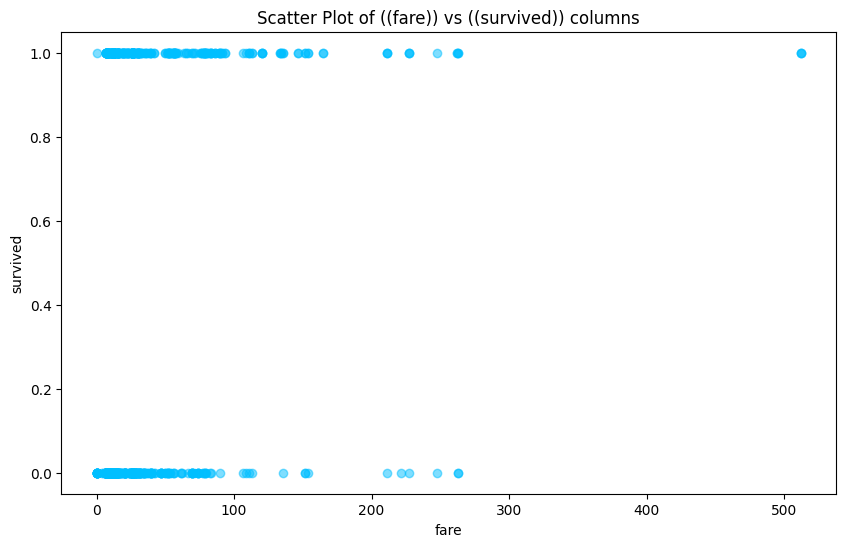

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df1_new['fare'], df1_new['survived'], color='deepskyblue', alpha=0.5)
plt.xlabel('fare')
plt.ylabel('survived')
plt.title('Scatter Plot of ((fare)) vs ((survived)) columns')
plt.show()

#### Q11: Use Matplotlib to plot the proportion of passengers that survived by class.

In [31]:
df1_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


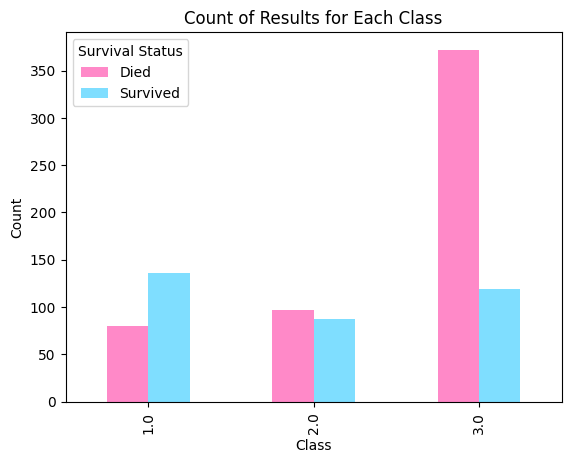

Mapping of classes: 1: First, 2: Second, 3: Third


In [32]:
result_counts = df1_new.groupby('pclass')['survived'].value_counts().unstack()

result_counts.plot(kind='bar', color=['deeppink', 'deepskyblue'], alpha=0.5)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Results for Each Class')
plt.legend(title='Survival Status', labels=['Died', 'Survived']) 
plt.show()

print("Mapping of classes: 1: First, 2: Second, 3: Third")

#### Q12: Plot the age distribution of passengers, distinguishing between those who survived and those who didn't.

Let's write a function to calculate the most applicable bin numbers in histograms for us by using the Freedman Diaconis formula:

In [33]:
def calculate_FreedManDiaconis_bin_num(target_column):
    # Calculate the Freedman-Diaconis bin width
    IQR = np.percentile(target_column, 75) - np.percentile(target_column, 25)
    bin_width = 2 * IQR / (len(target_column) ** (1/3))

    # Calculate the number of bins based on the Freedman-Diaconis rule
    num_bins = int(np.ceil((target_column.max() - target_column.min()) / bin_width))
    if num_bins < 50:
        return num_bins
    else:
        return 100

The age distribution of passengers:

Text(0.5, 1.0, 'Age distribution of all passengers')

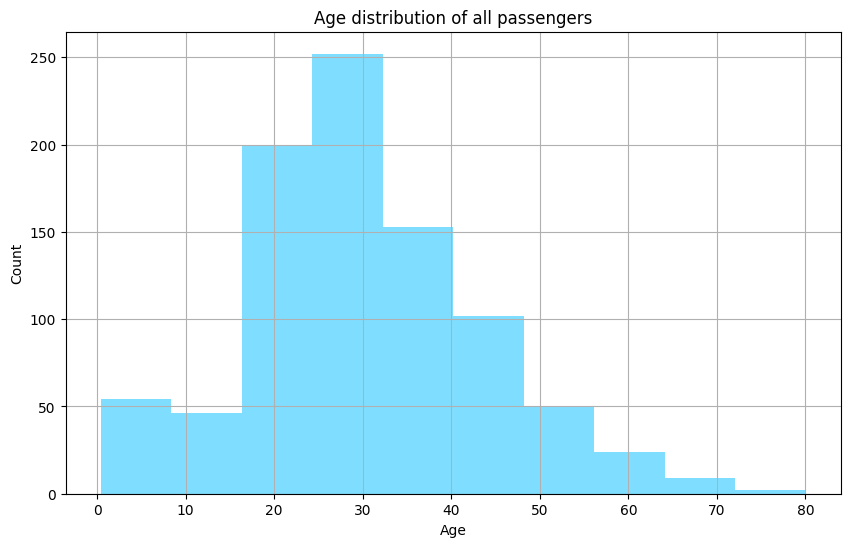

In [34]:
plt.figure(figsize=(10, 6))
df1_new['age'].hist(color='deepskyblue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution of all passengers')

In [35]:
survived_passengers = df1_new[df1_new['survived'] == 1]
survived_ages = survived_passengers['age']
type(survived_ages)

pandas.core.series.Series

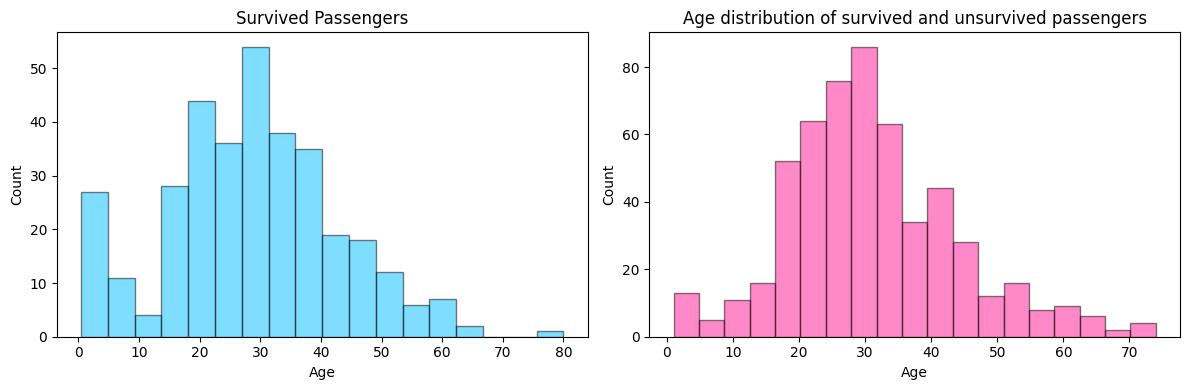

In [36]:
survived_passengers = df1_new[df1_new['survived'] == 1]
unsurvived_passengers = df1_new[df1_new['survived'] == 0]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].hist(survived_passengers['age'], bins=calculate_FreedManDiaconis_bin_num(survived_passengers['age']), color='deepskyblue', edgecolor='black', alpha=0.5)
axes[0].set_title('Survived Passengers')

axes[1].hist(unsurvived_passengers['age'], bins=calculate_FreedManDiaconis_bin_num(unsurvived_passengers['age']), color='deeppink', edgecolor='black', alpha=0.5)
axes[1].set_title('Unsurvived Passengers')

for ax in axes:
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.title('Age distribution of survived and unsurvived passengers')
 
plt.show()

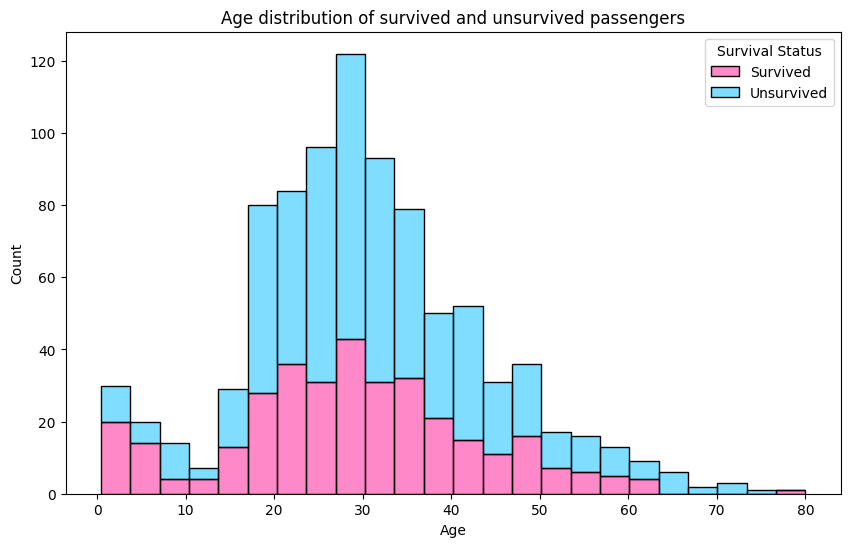

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1_new, x='age', hue='survived', palette=['deepskyblue', 'deeppink'], alpha=0.5, multiple='stack', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution of survived and unsurvived passengers')
plt.legend(title='Survival Status', labels=['Survived', 'Unsurvived'])
plt.show()


#### Q13: Create a scatter plot showing the relationship between age and fare paid, color-coded by survival.


Text(0.5, 1.0, 'Scatter plot of the ((age)) and ((fare)) features')

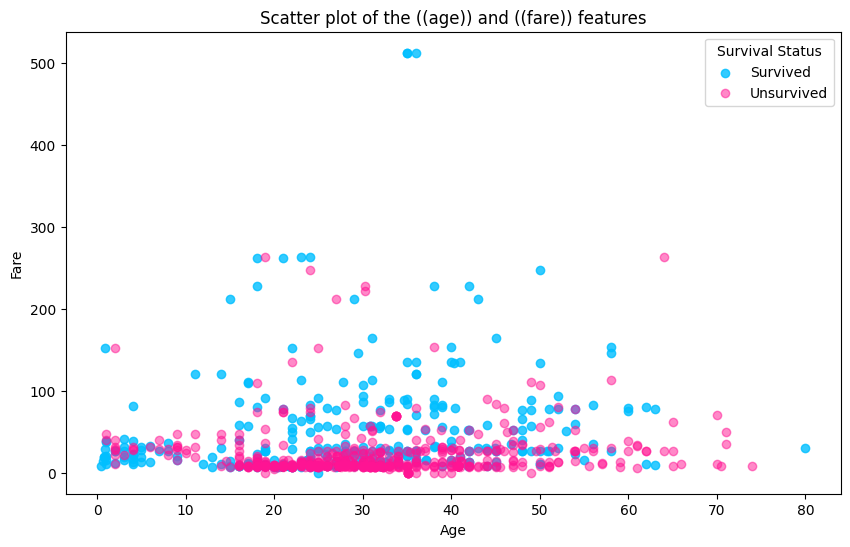

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(survived_passengers['age'], survived_passengers['fare'], color='deepskyblue', alpha=0.8)
plt.scatter(unsurvived_passengers['age'], unsurvived_passengers['fare'], color='deeppink', alpha=0.5)

plt.legend(['Survived', 'Unsurvived'], title='Survival Status', loc='upper right')

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title('Scatter plot of the ((age)) and ((fare)) features')

#### Q14: Create a pivot table to show the average fare and survival rate for each class and sex combination.

In [39]:
survival_stat = df1_new.groupby(['pclass','sex'])
print("Mapping of sex:", column_mappings['sex'])
survival_stat.mean()[['survived', 'fare']]

Mapping of sex: {'female': 0, 'male': 1}


survived        fare
pclass sex                      
1.0    0.0  0.968085  106.125798
       1.0  0.368852   67.226127
2.0    0.0  0.921053   21.970121
       1.0  0.157407   19.741782
3.0    0.0  0.500000   16.118810
       1.0  0.135447   12.661633

#### Q15: Plot a grouped bar chart using Matplotlib to show the average fare paid by passengers, grouped by their class and survival status.

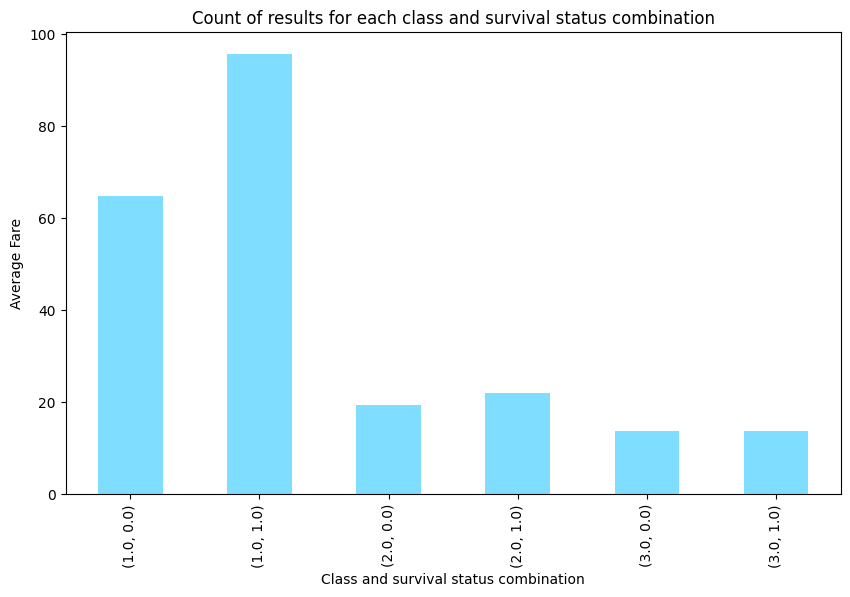

Each set of cobminations shows the (class num, survived, not survived)
Mapping of classes: 1: First, 2: Second, 3: Third


In [40]:
survival_stat = df1_new.groupby(['pclass','survived'])

plt.figure(figsize=(10, 6))
survival_stat.mean()['fare'].plot(kind='bar', color='deepskyblue', alpha=0.5)
plt.xlabel('Class and survival status combination')
plt.ylabel('Average Fare')
plt.title('Count of results for each class and survival status combination')
plt.show()

print('Each set of cobminations shows the (class num, survived, not survived)')
print("Mapping of classes: 1: First, 2: Second, 3: Third")

## Data Scientist Salaries

In this section, we will work with the `salaries dataset` which contains information about the salaries of data scientists across different regions from 2020 to 2024.

In [41]:
salaries_path = 'salaries_dataset.csv'
salaries_df = pd.read_csv(salaries_path)
salaries_df.head()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium


In [42]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         13972 non-null  int64 
 1   Experience_Level  13972 non-null  object
 2   Employment_Type   13972 non-null  object
 3   Job_Title         13972 non-null  object
 4   Salary            13972 non-null  int64 
 5   Salary_Currency   13972 non-null  object
 6   Remote_Ratio      13972 non-null  int64 
 7   Company_Size      13972 non-null  object
dtypes: int64(3), object(5)
memory usage: 873.4+ KB


### Data Cleaning

#### Handling Missing Values and Duplicates

Now we remove the duplicates and the missing values from the dataset.  
although we have no missing values in the dataset, we have some duplicates.

In [43]:
salaries_df = salaries_df.drop_duplicates()

In [44]:
salaries_df = salaries_df.dropna()

In [45]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8407 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         8407 non-null   int64 
 1   Experience_Level  8407 non-null   object
 2   Employment_Type   8407 non-null   object
 3   Job_Title         8407 non-null   object
 4   Salary            8407 non-null   int64 
 5   Salary_Currency   8407 non-null   object
 6   Remote_Ratio      8407 non-null   int64 
 7   Company_Size      8407 non-null   object
dtypes: int64(3), object(5)
memory usage: 591.1+ KB


#### Converting Currencies

In [46]:
print(f'There are {len(salaries_df["Salary_Currency"].unique())} different currencies in the dataset')
salaries_df['Salary_Currency'].unique()

There are 23 different currencies in the dataset


array(['USD', 'EUR', 'GBP', 'CHF', 'CAD', 'NZD', 'AUD', 'INR', 'PLN',
       'BRL', 'PHP', 'TRY', 'NOK', 'JPY', 'ZAR', 'HKD', 'SGD', 'ILS',
       'THB', 'HUF', 'DKK', 'MXN', 'CLP'], dtype=object)

In [47]:
salaries_df['Salary_Currency'].value_counts()

USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
PLN       7
CHF       6
SGD       6
JPY       4
BRL       4
DKK       3
HUF       3
TRY       3
NOK       2
THB       2
ZAR       1
HKD       1
ILS       1
PHP       1
NZD       1
MXN       1
CLP       1
Name: Salary_Currency, dtype: int64

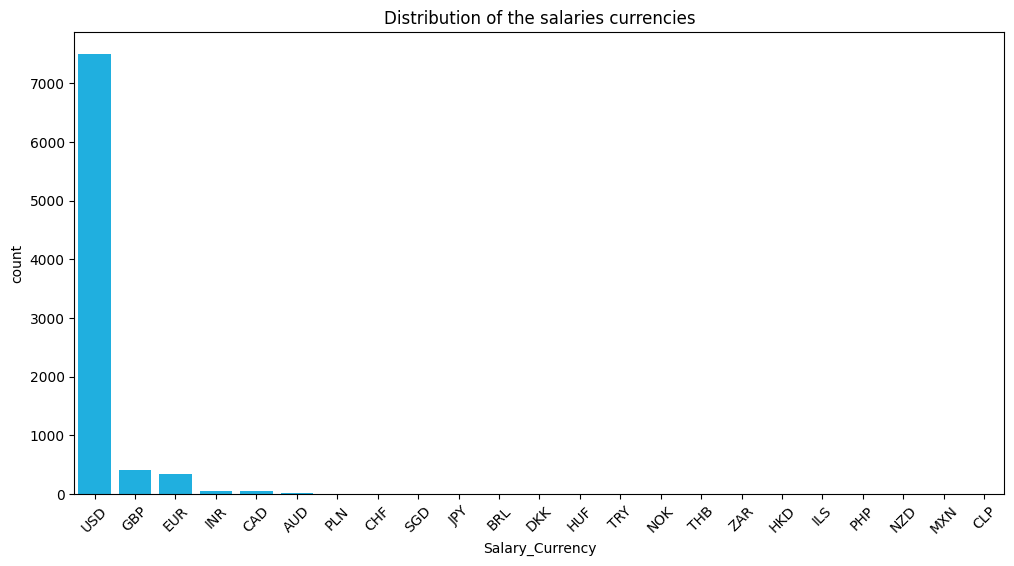

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(data=salaries_df, x='Salary_Currency', order=salaries_df['Salary_Currency'].value_counts().index, color='deepskyblue')
plt.title('Distribution of the salaries currencies')
plt.xticks(rotation=45)
plt.show()

As we can see, the salaries are in different currencies. We need to convert them to a single currency which is the US Dollar. We will use the `forex-python` library to convert the salaries to USD.

But first, we remove information about the currencies with less than 10 occurrences.

In [49]:
currencies_to_remove = salaries_df['Salary_Currency'].value_counts()[salaries_df['Salary_Currency'].value_counts() < 10].index
salaries_df = salaries_df[~salaries_df['Salary_Currency'].isin(currencies_to_remove)]
print(f'Now there are {len(salaries_df["Salary_Currency"].unique())} different currencies in the dataset')

Now there are 6 different currencies in the dataset


In [50]:
salaries_df['Salary_Currency'].value_counts()

USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
Name: Salary_Currency, dtype: int64

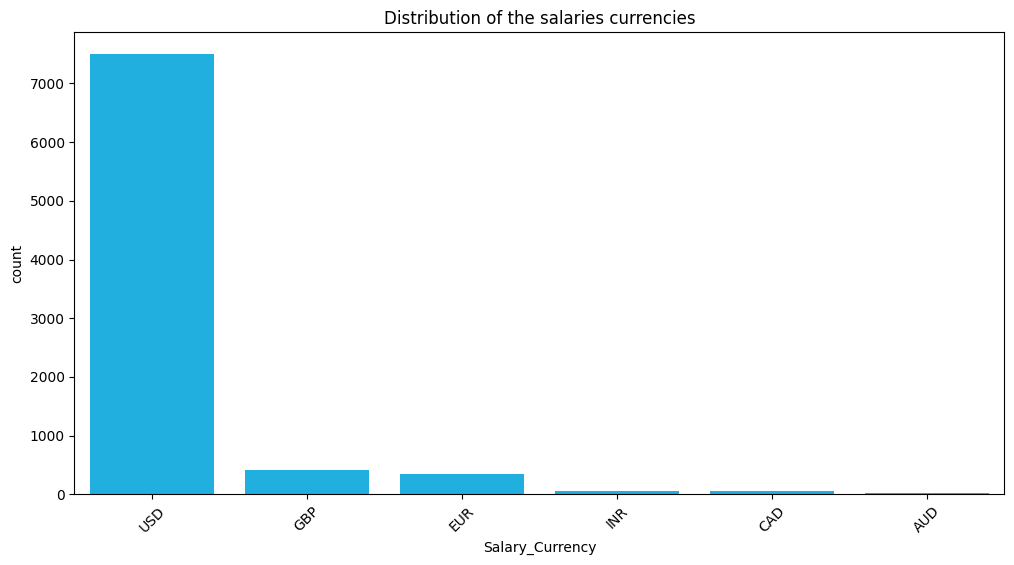

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(data=salaries_df, x='Salary_Currency', order=salaries_df['Salary_Currency'].value_counts().index, color='deepskyblue')
plt.title('Distribution of the salaries currencies')
plt.xticks(rotation=45)
plt.show()

Now we convert the salaries to USD.

In [52]:
c = CurrencyRates()
conversion_ratios = c.get_rates('USD')
conversion_ratios

{'EUR': 0.9286775631500743,
 'JPY': 150.33432392273403,
 'BGN': 1.8163075780089153,
 'CZK': 23.64413075780089,
 'DKK': 6.922919762258544,
 'GBP': 0.794994427934621,
 'HUF': 361.3763001485884,
 'PLN': 4.030460624071322,
 'RON': 4.622121099554235,
 'SEK': 10.462017087667162,
 'CHF': 0.8814078751857356,
 'ISK': 138.46582466567608,
 'NOK': 10.545598068350667,
 'TRY': 30.827544576523028,
 'AUD': 1.5338967310549776,
 'BRL': 4.973161218424963,
 'CAD': 1.348254086181278,
 'CNY': 7.193629271916791,
 'HKD': 7.8228083209509665,
 'IDR': 15636.497028231799,
 'INR': 83.00659361069837,
 'KRW': 1332.73588410104,
 'MXN': 17.044576523031203,
 'MYR': 4.780460624071322,
 'NZD': 1.638930163447251,
 'PHP': 55.96025260029718,
 'SGD': 1.3465824665676076,
 'THB': 36.059621099554235,
 'ZAR': 18.886979940564636}

In [53]:
conversion_ratios = {k: 1/v for k, v in conversion_ratios.items()}
conversion_ratios

{'EUR': 1.0768,
 'JPY': 0.006651840869780084,
 'BGN': 0.5505675426935269,
 'CZK': 0.042293794186959936,
 'DKK': 0.14444772355324229,
 'GBP': 1.2578704514923194,
 'HUF': 0.002767198622568293,
 'PLN': 0.24811059907834102,
 'RON': 0.21635088706274738,
 'SEK': 0.09558386223425502,
 'CHF': 1.1345485196501948,
 'ISK': 0.007221998658618377,
 'NOK': 0.09482629562766942,
 'TRY': 0.032438522553027406,
 'AUD': 0.6519343706484229,
 'BRL': 0.20107934492353086,
 'CAD': 0.7416999586719933,
 'CNY': 0.13901188985424923,
 'HKD': 0.1278313310223657,
 'IDR': 6.395294279751362e-05,
 'INR': 0.012047235725513668,
 'KRW': 0.0007503362158470898,
 'MXN': 0.058669688780402754,
 'MYR': 0.2091848628487062,
 'NZD': 0.6101541251133273,
 'PHP': 0.017869826413090376,
 'SGD': 0.7426206896551725,
 'THB': 0.027731849905998095,
 'ZAR': 0.05294652735095267}

In [54]:
GBP_values_before_converting = salaries_df[salaries_df['Salary_Currency'] == 'GBP']['Salary']

In [55]:
salaries_df['Salary_USD'] = salaries_df.apply(lambda x: x['Salary'] if x['Salary_Currency'] == 'USD' else x['Salary'] * conversion_ratios[x['Salary_Currency']], axis=1)
GBP_values_after_converting = salaries_df[salaries_df['Salary_Currency'] == 'GBP']['Salary_USD']

We can plot the distribution of the salaries with `GBP` currency before and after the conversion to see the effect of the conversion. 

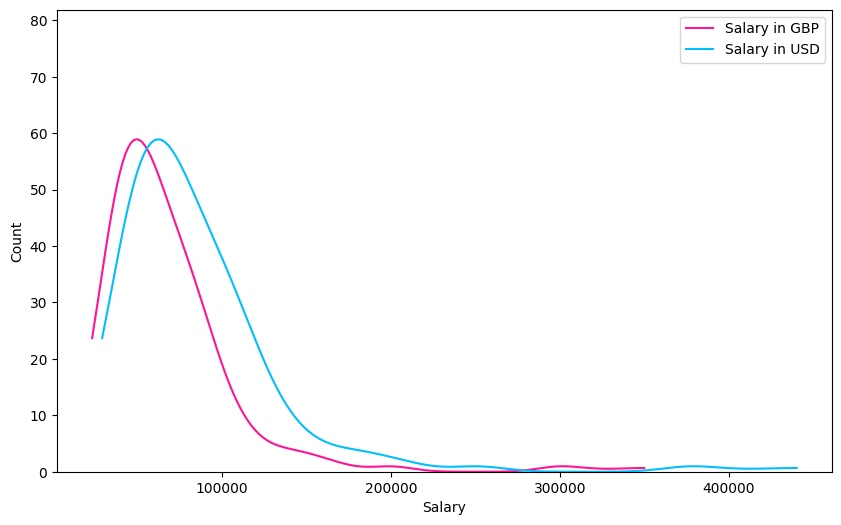

In [56]:
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(GBP_values_before_converting, kde=True, color='deeppink', alpha=0.5)
ax2 = sns.histplot(GBP_values_after_converting, kde=True, color='deepskyblue', alpha=0.5)
ax1.containers[0].remove()
ax2.containers[0].remove()
plt.legend(['Salary in GBP', 'Salary in USD'])
plt.show()

As we can see in the above plot, the distribution of the salaries in `GBP` currency is just shifted to the right by a factor after the conversion to `USD`.

### Exploratory Data Analysis

In [57]:
salaries_df.describe()

,Work_Year,Salary,Remote_Ratio,Salary_USD
count,8360.000000,8.360000e+03,8360.000000,8360.000000
mean,2023.096411,1.630027e+05,37.021531,147311.232093
std,0.771106,2.428316e+05,47.615515,73103.473506
min,2020.000000,1.400000e+04,0.000000,14456.682871
25%,2023.000000,9.600000e+04,0.000000,96000.000000
50%,2023.000000,1.400000e+05,0.000000,139000.000000
75%,2024.000000,1.880000e+05,100.000000,186000.000000
max,2024.000000,7.500000e+06,100.000000,800000.000000


#### Distribution of Variables

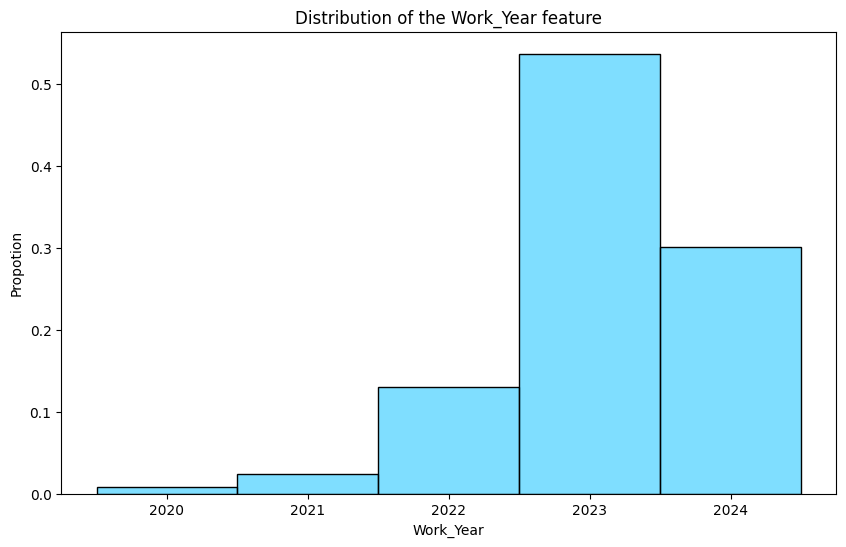

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data=salaries_df, x='Work_Year', color='deepskyblue', alpha=0.5, discrete=True, element='bars', stat='probability')
plt.title('Distribution of the Work_Year feature')
plt.ylabel('Propotion')
plt.show()

As we can see, the dataset contains the information from 2020 to 2024.

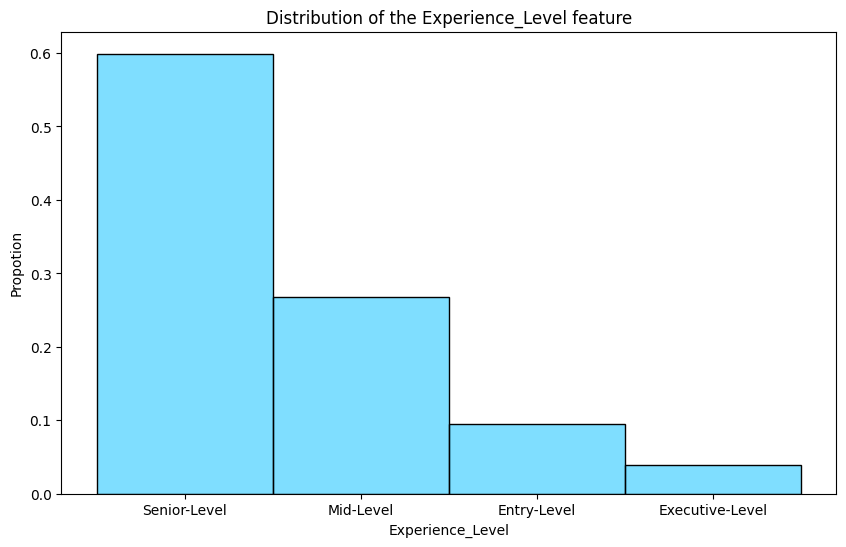

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data=salaries_df, x='Experience_Level', color='deepskyblue', alpha=0.5, discrete=True, element='bars', stat='probability')
plt.title('Distribution of the Experience_Level feature')
plt.ylabel('Propotion')
plt.show()

In [60]:
salaries_df['Employment_Type'].value_counts()

Full-Time    8304
Contract       25
Part-Time      19
Freelance      12
Name: Employment_Type, dtype: int64

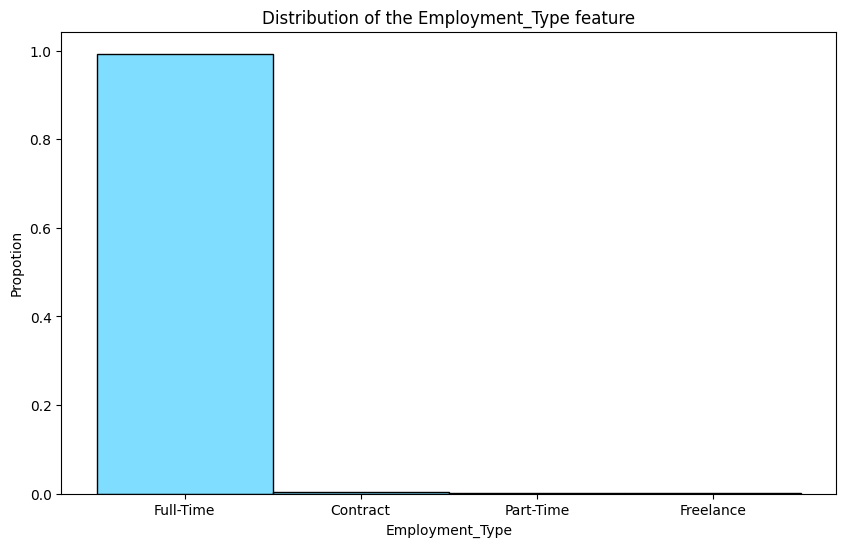

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=salaries_df, x='Employment_Type', color='deepskyblue', alpha=0.5, discrete=True, element='bars', stat='probability')
plt.title('Distribution of the Employment_Type feature')
plt.ylabel('Propotion')
plt.show()


As we can see, the majority of the data scientists in this dataset work as a full-time employee.

In [62]:
print(f'There are {len(salaries_df["Job_Title"].unique())} different job titles in the dataset')

There are 145 different job titles in the dataset


Because the dataset contains a lot of job titles, we will only plot the top 10 job titles.

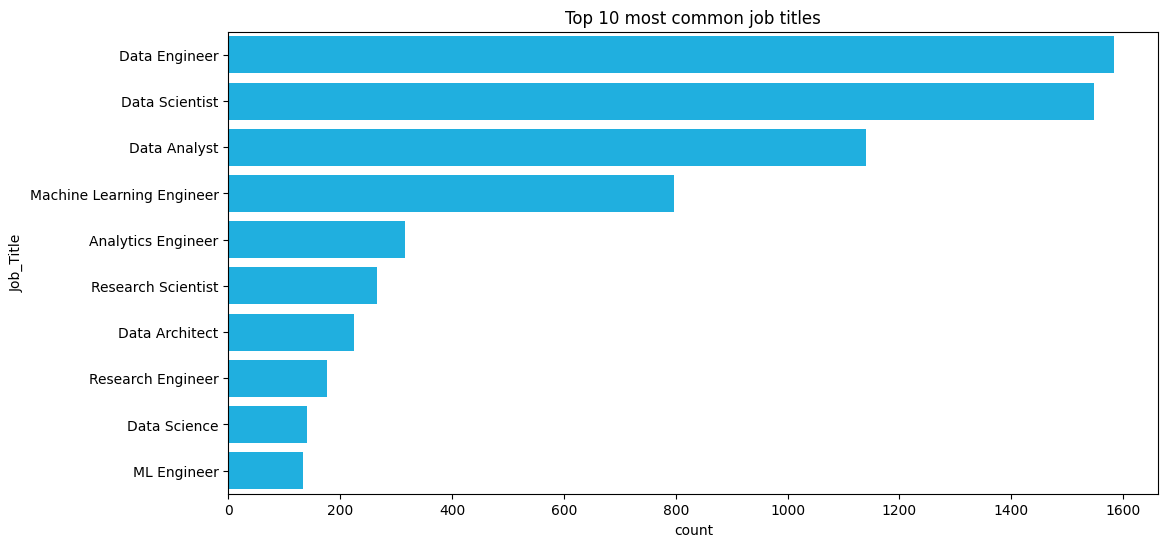

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data=salaries_df, y='Job_Title', order=salaries_df['Job_Title'].value_counts().index[:10], color='deepskyblue')
plt.title('Top 10 most common job titles')
plt.show() 

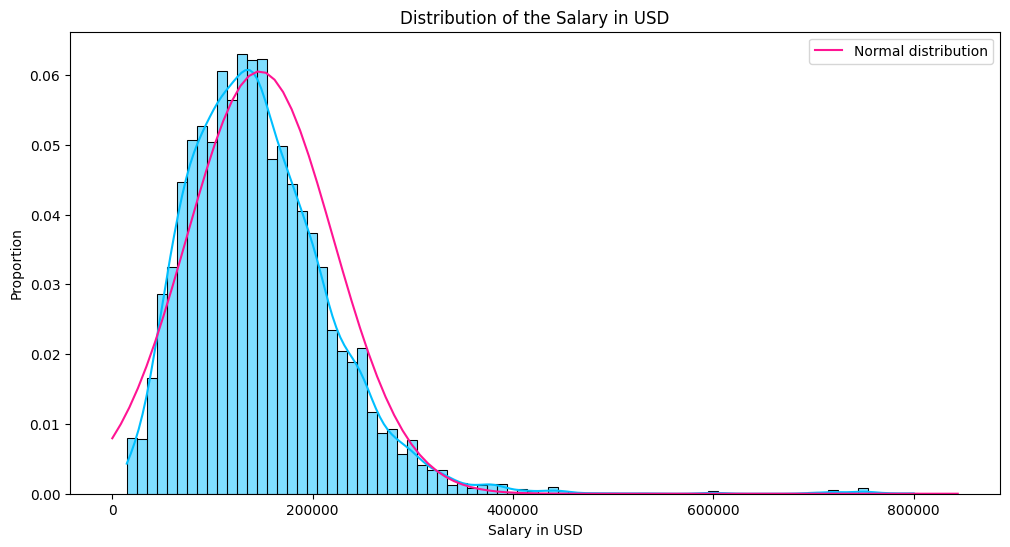

In [64]:
plt.figure(figsize=(12, 6))
sns.histplot(data=salaries_df, x='Salary_USD', color='deepskyblue', alpha=0.5, kde=True, stat='probability', element='bars', binwidth=10000)
mu, std = sp.stats.norm.fit(salaries_df['Salary_USD'])
xmin, xmax = plt.xlim()
x = np.linspace(0, xmax, 100)
p = sp.stats.norm.pdf(x, mu, std)
scale_factor = max(salaries_df['Salary_USD'].value_counts()) / (2050 * max(p))
p = p * scale_factor
plt.plot(x, p, color='deeppink', label='Normal distribution')
plt.title('Distribution of the Salary in USD')
plt.ylabel('Proportion')
plt.xlabel('Salary in USD')
plt.legend()
plt.show()

In [65]:
salaries_df['Remote_Ratio'].value_counts()

0      5157
100    2987
50      216
Name: Remote_Ratio, dtype: int64

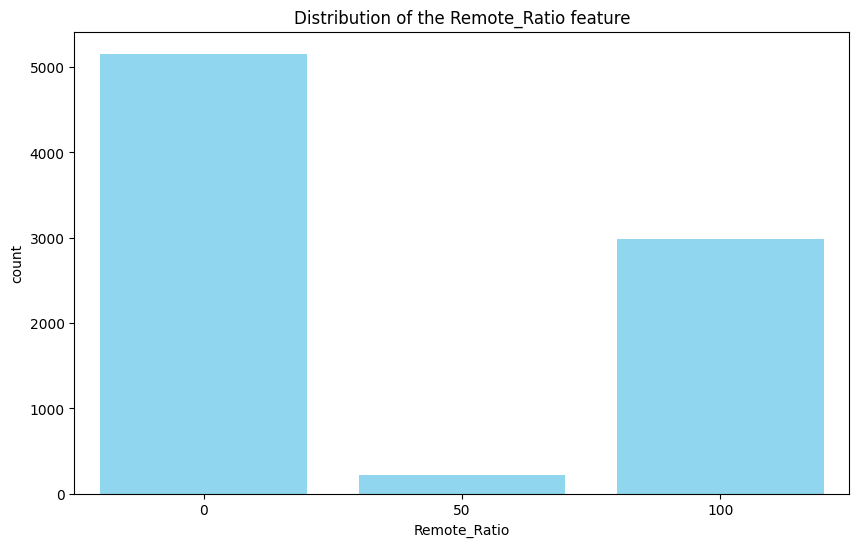

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=salaries_df, x='Remote_Ratio', color='deepskyblue', alpha=0.5)
plt.title('Distribution of the Remote_Ratio feature')
plt.show()


In [67]:
salaries_df['Company_Size'].value_counts()

Medium    7610
Large      585
S          165
Name: Company_Size, dtype: int64

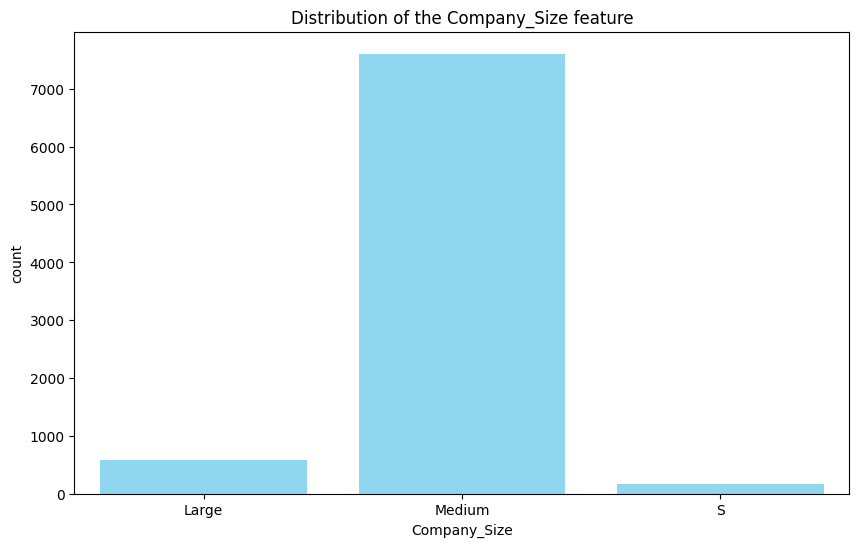

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=salaries_df, x='Company_Size', color='deepskyblue', alpha=0.5)
plt.title('Distribution of the Company_Size feature')
plt.show()

#### Most Popular Job Titles

Earlier, we saw the top 10 most popular job titles in the dataset.

In the below plot, we can see the distribution of the salaries for the top 10 job titles.

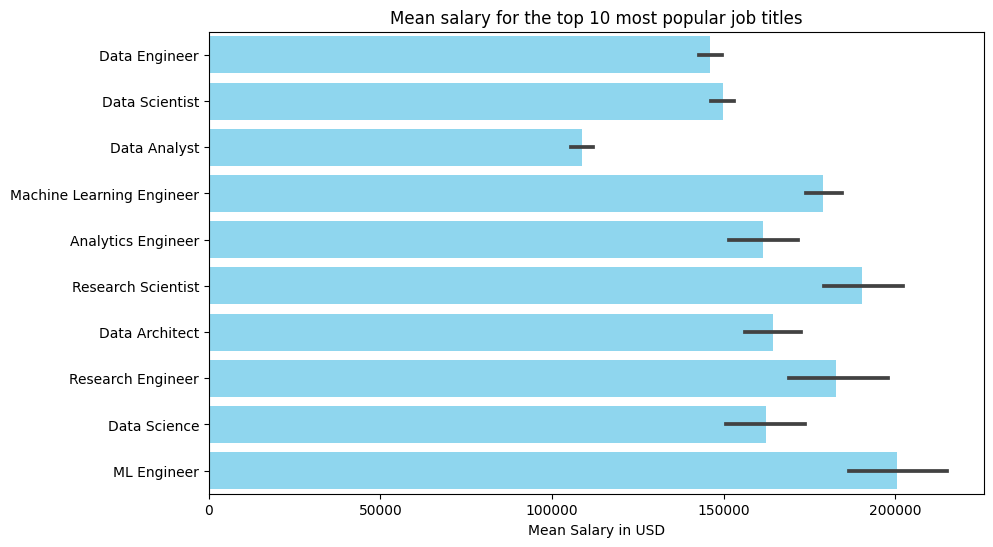

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=salaries_df, y='Job_Title', x='Salary_USD', order=salaries_df['Job_Title'].value_counts().index[:10], color='deepskyblue', alpha=0.5)
plt.title('Mean salary for the top 10 most popular job titles')
plt.ylabel(None)
plt.xlabel('Mean Salary in USD')
plt.show()

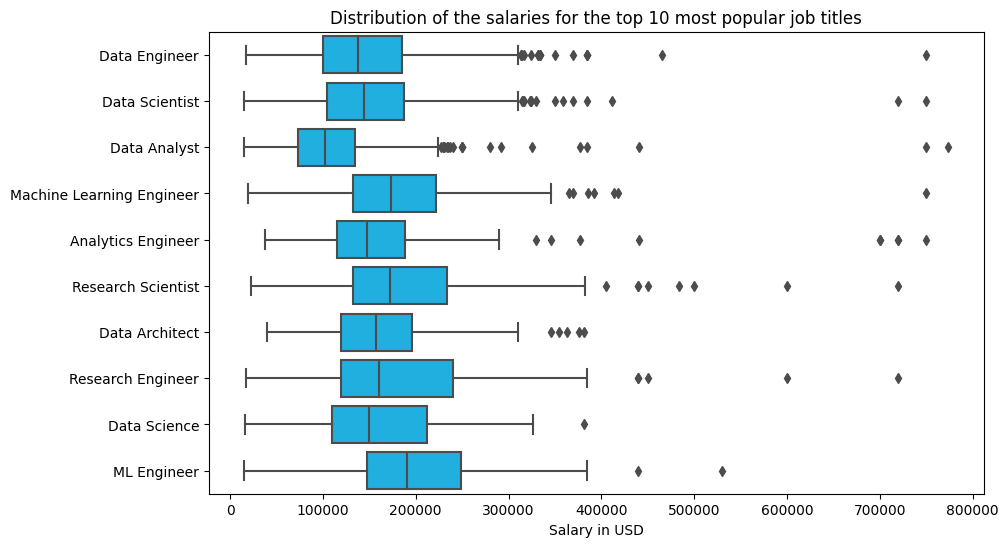

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salaries_df, y='Job_Title', x='Salary_USD', order=salaries_df['Job_Title'].value_counts().index[:10], color='deepskyblue')
plt.title('Distribution of the salaries for the top 10 most popular job titles')
plt.ylabel(None)
plt.xlabel('Salary in USD')
plt.show()

As we can see in the above plots, the salaries for the top 10 job titles are distributed differently.

The `ML Engineer` job title has the highest median salary among the top 10 job titles. The `Data Analyst` job title has the lowest median salary among the top 10 job titles.

The `Research Engineer` job title has the widest box and therefore the highest variance in salaries among the top 10 job titles. There could be a wider range of experience levels or job responsibilities within this title.

The whiskers for the `ML Engineer` and `Data Architect` job titles are the shortest among the top 10 job titles. This indicates that the salaries for these job titles are more consistent compared to the other job titles.

#### Job Titles with the Highest Salaries

In this section, we want to identify and analyze the job titles with the highest salaries. for more reliable results, we only consider the job titles with more than 10 occurrences.

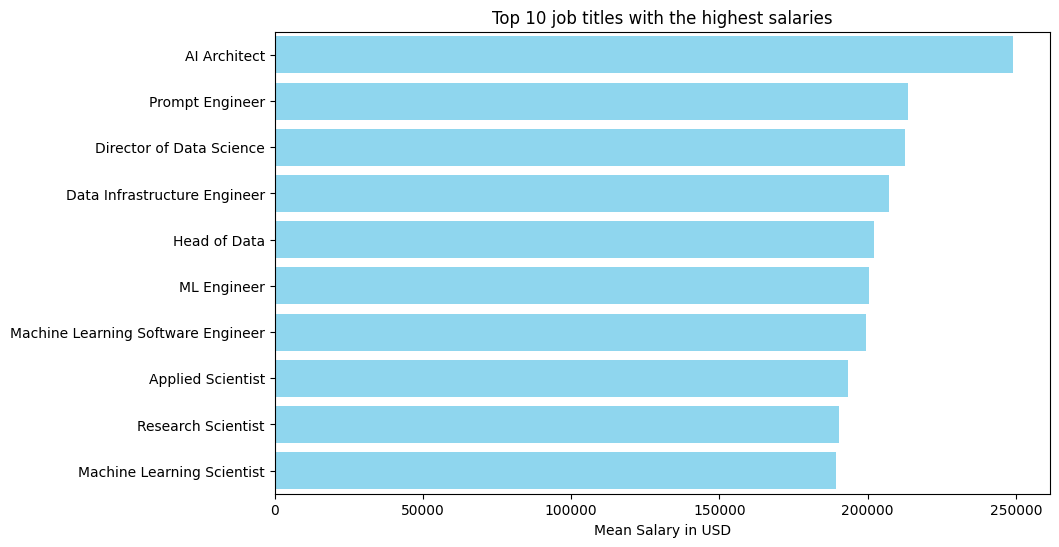

In [71]:
job_titles = salaries_df['Job_Title'].value_counts()
job_titles = job_titles[job_titles > 10].index

salaries_df_filtered = salaries_df[salaries_df['Job_Title'].isin(job_titles)]
salaries_df_filtered = salaries_df_filtered.groupby('Job_Title').mean().sort_values('Salary_USD', ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=salaries_df_filtered.head(10), y='Job_Title', x='Salary_USD', color='deepskyblue', alpha=0.5)
plt.title('Top 10 job titles with the highest salaries')
plt.ylabel(None)
plt.xlabel('Mean Salary in USD')
plt.show()

In the following plot, we can see the information about 10 highest paid employees.

In [72]:
sorted_salaries_df = salaries_df.sort_values('Salary_USD', ascending=False).reset_index(drop=True).drop(columns=['Salary', 'Salary_Currency'])
salaries_df.head(10)

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_USD
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large,90000.0
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium,180500.0
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium,96200.0
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium,235000.0
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium,175000.0
5,2024,Mid-Level,Full-Time,Business Intelligence Developer,95413,USD,100,Medium,95413.0
6,2024,Mid-Level,Full-Time,Business Intelligence Developer,70692,USD,100,Medium,70692.0
7,2024,Senior-Level,Full-Time,Data Engineer,110000,USD,0,Medium,110000.0
8,2024,Senior-Level,Full-Time,Data Engineer,48000,USD,0,Medium,48000.0
9,2024,Senior-Level,Full-Time,Data Scientist,222300,USD,0,Medium,222300.0


As we can see, all of the top 10 highest paid employees work as a full-time employee in a medium-sized company and Only the first one works remotely.

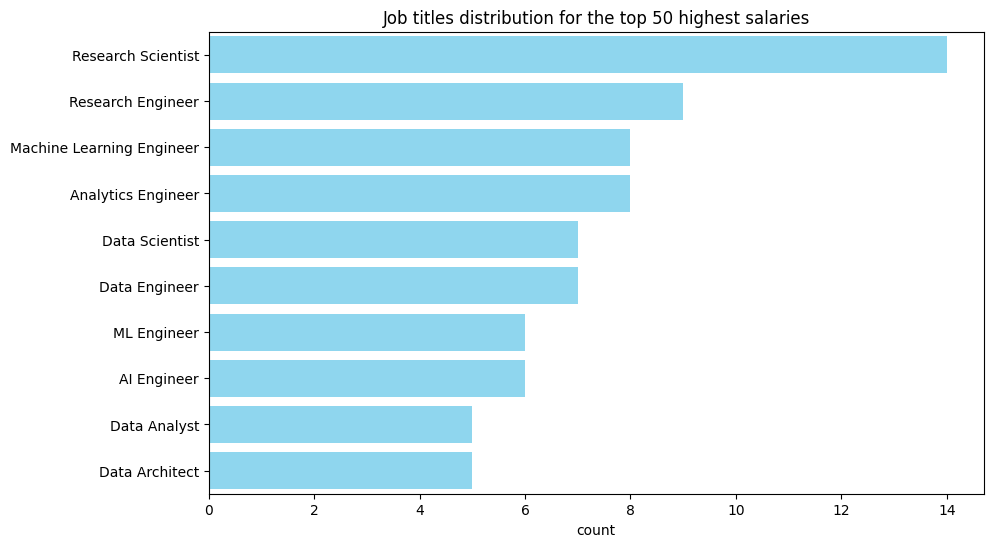

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=sorted_salaries_df.head(100), y='Job_Title', color='deepskyblue', alpha=0.5, order=sorted_salaries_df.head(100)['Job_Title'].value_counts().index)
plt.ylim(9.5, -0.5)
plt.title('Job titles distribution for the top 50 highest salaries')
plt.ylabel(None)
plt.show()


In the above plot, we can see the distribution of the job titles for top 100 highest paid employees.

#### Salary Distribution for Different Employment Types

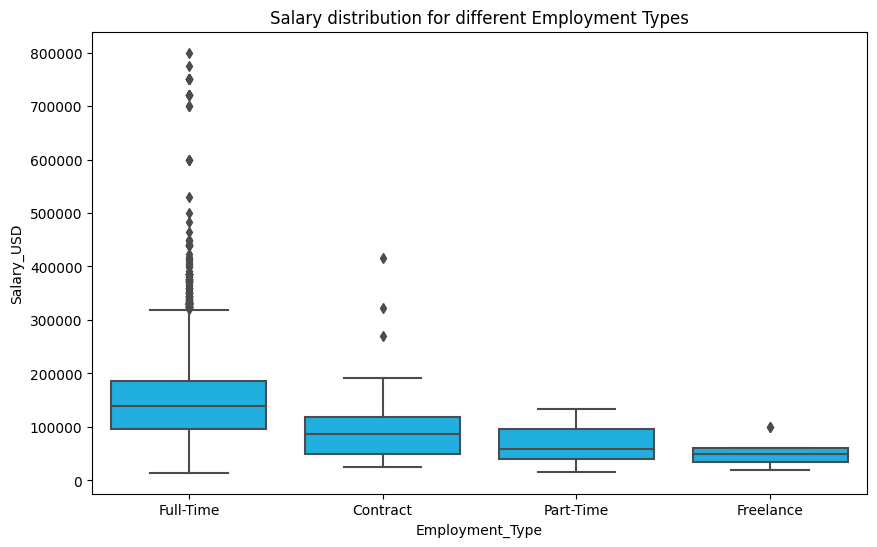

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salaries_df, x='Employment_Type', y='Salary_USD', color='deepskyblue')
plt.title('Salary distribution for different Employment Types')
plt.show()

As we can see in the box plot, The median salary appears to be highest for full-time employment, followed by contract, freelance, and then part-time employment. 
 
The box for full-time employment is wider than the others, indicating a larger spread in salaries. This means full-time salaries can vary more than in other employment types. This could be because of the larger range of positions included in `Full-Time` compared to the other categories, potentially contributing to the wider spread.  

The whiskers for full-time employment extend further than the others, again suggesting a greater range of salaries in this category. There may be a significant number of outliers on both the higher and lower ends for full-time positions.

#### Salary Distribution for Different Company Sizes

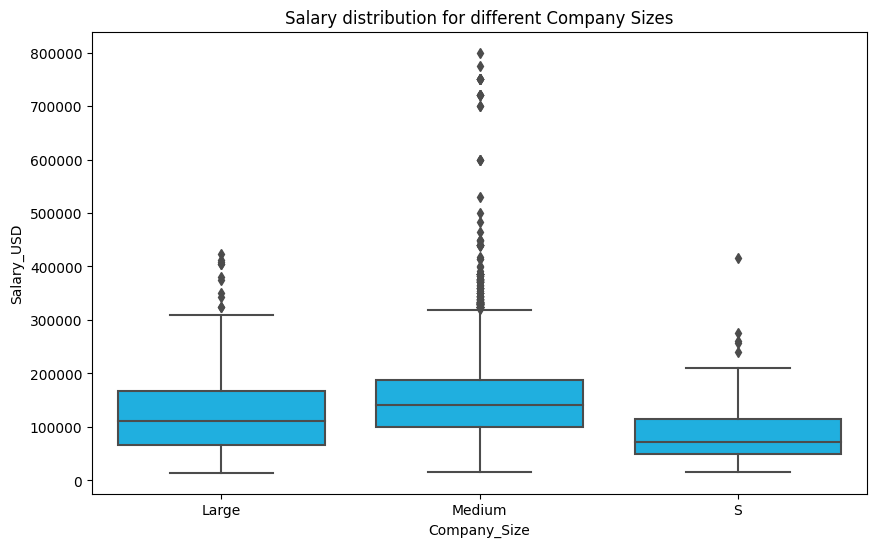

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salaries_df, x='Company_Size', y='Salary_USD', color='deepskyblue')
plt.title('Salary distribution for different Company Sizes')
plt.show()

The median salary appears to be highest for medium-sized companies, followed by large, and then small companies.

The spread and whiskers in this plot can be affected by the number of data points in each category. 

#### Salary Trends Over Time

In this section, we will analyze the salary trends over time. We will plot the median salary for each year from 2020 to 2024.

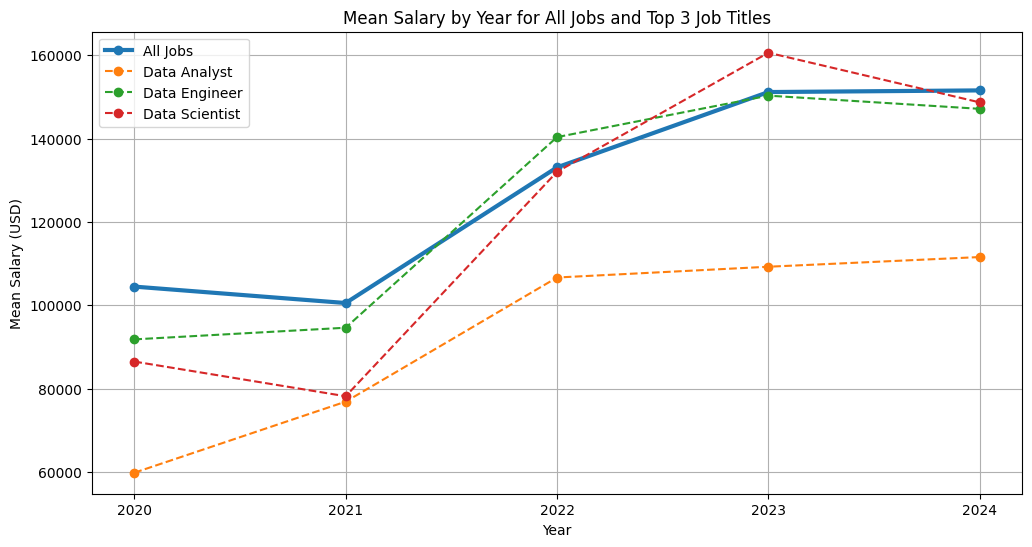

In [76]:
top_jobs_count = 3

mean_salary_by_year = salaries_df.groupby('Work_Year')['Salary_USD'].mean()

top_job_titles = salaries_df['Job_Title'].value_counts().head(top_jobs_count).index.tolist()
filtered_data_top_jobs = salaries_df[salaries_df['Job_Title'].isin(top_job_titles)]

mean_salary_by_year_top_jobs = filtered_data_top_jobs.groupby(['Work_Year', 'Job_Title'])['Salary_USD'].mean().unstack()

plt.figure(figsize=(12, 6))

plt.plot(mean_salary_by_year.index, mean_salary_by_year.values, label='All Jobs', marker='o', linewidth=3)

for job_title in mean_salary_by_year_top_jobs.columns:
    plt.plot(mean_salary_by_year_top_jobs.index, mean_salary_by_year_top_jobs[job_title], label=job_title, linestyle='--', marker='o')

plt.xlabel('Year')
plt.ylabel('Mean Salary (USD)')
plt.title(f'Mean Salary by Year for All Jobs and Top {top_jobs_count} Job Titles')
plt.xticks(mean_salary_by_year.index)
plt.legend()
plt.grid(True)
plt.show()

As we can see in the above plot, the mean salary has increased over the years. 

As of 2024, the popular job titles have lower salaries compared to the average salary. This could be due to the increase in the number of data scientists in the market, leading to more competition and potentially lower salaries.

#### Salary Distribution for Different Experience Levels

In this section, we will analyze the salary distribution for different experience levels.

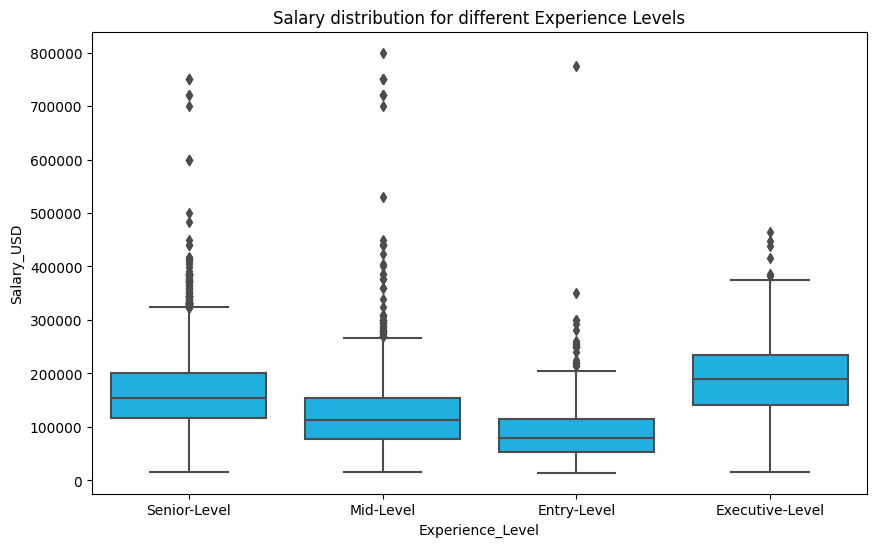

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salaries_df, x='Experience_Level', y='Salary_USD', color='deepskyblue')
plt.title('Salary distribution for different Experience Levels')
plt.show()

The median salary increases as the experience level goes up. This suggests that employees with more experience tend to earn higher salaries.

The boxes get wider as the experience level increases. This indicates that the spread in salaries increases for more experienced workers. There could be several reasons for this. For example, senior-level roles may have a wider range of responsibilities or require more specialized skills, leading to a wider range of salaries.

#### Correlation between Variables

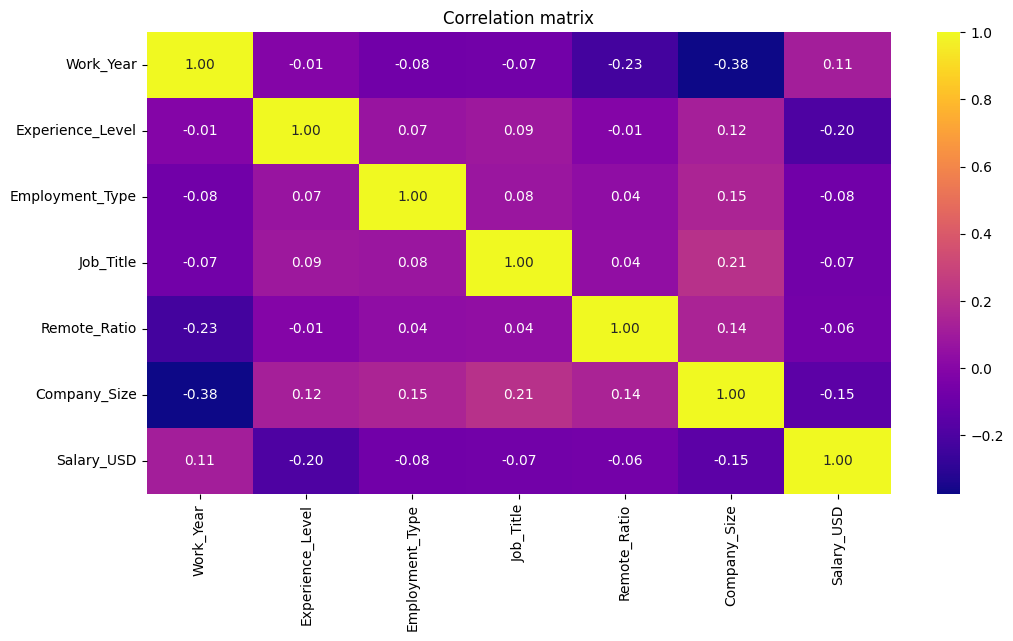

In [79]:
encoded_salaries_df = salaries_df.copy().drop(columns=['Salary', 'Salary_Currency'])
label_dict = {}
for column in encoded_salaries_df.select_dtypes(include=['object']).columns:
	value_counts = encoded_salaries_df[column].value_counts()
	labels = {value: idx for idx, (value, count) in enumerate(value_counts.items())}
	label_dict[column] = labels
	encoded_salaries_df[column] = encoded_salaries_df[column].map(labels)

correlation_matrix = encoded_salaries_df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation matrix')
plt.show()